<a href="https://colab.research.google.com/github/anindya2001/GraphSemanticSegmentation/blob/main/Graph_final_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import math
import scipy.io
import random

M = 8
R = 78
class Event:
    def __init__(self, x, y, t, p):
        self.x = x
        self.y = y
        self.t = t
        self.p = p

def isWithin(event1, event2, radius, alpha=1, beta=0.000005):
    x_i = event1.x
    x_j = event2.x
    y_i = event1.y
    y_j = event2.y
    t_i = event1.t/1000
    t_j = event2.t/1000
    spatial = (x_i - x_j)*(x_i - x_j) + (y_i - y_j)*(y_i - y_j)
    temporal = (t_i - t_j)*(t_i - t_j)
    if (alpha * spatial) + (beta * temporal * 1000000) >= 0:
      #print(math.sqrt(alpha * spatial + beta * temporal))
      return math.sqrt(alpha * spatial + beta * temporal) <= radius


def main():
    data = scipy.io.loadmat('/d_0713.mat')
    event = []  # M objects of Event class

    # appending only non-zero events in list
    zero_polarity_count = 0
    nonzero_polarity_count = 0
    neg = 0
    for i in range(len(data['x'])):
      if data['pol'][i]==-1:
        neg += 1
      if data['pol'][i]==0:
        zero_polarity_count += 1
      else:
        nonzero_polarity_count += 1
        event.append(Event(data['x'][i], data['y'][i], data['ts'][i], data['pol'][i]))
    print(neg)
    #print('Zeroes', zero_polarity_count)
    #print('Non-zeroes', nonzero_polarity_count)

    # shuffling the list and selecting the first M events i.e., random sampling
    random.shuffle(event)
    selected_event = event[:M]

    for e in selected_event:
      print(e.x, e.y, e.t, e.p)
    
    adMat = np.zeros([M, M], dtype=int)
    print('Initial\n', adMat)
    for row in range(M):
        for col in adMat[row]:
            if row == col:
              continue 
            if isWithin(event[row], event[col], R):
                adMat[row][col] = 1
                adMat[col][row] = 1
            else:
                adMat[row][col] = 0
                adMat[col][row] = 0
    print('Final\n', adMat)
        
if __name__ == "__main__":
    main()

0
[113] [97] [64367] [1]
[143] [20] [16977] [1]
[131] [100] [84002] [1]
[110] [144] [38181] [1]
[142] [44] [28701] [1]
[144] [94] [41545] [1]
[160] [86] [17764] [1]
[140] [18] [70798] [1]
Initial
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
Final
 [[0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


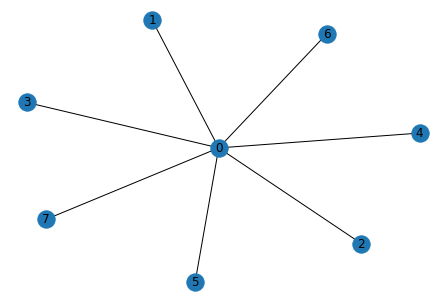

In [43]:
import networkx as nx 
import numpy as np 
  
A  =  [[0, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0]]
 
G = nx.from_numpy_matrix(np.array(A))  
nx.draw(G, with_labels=1)